In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, KFold
from sklearn import linear_model
from sklearn.feature_extraction import DictVectorizer
from sklearn.base import clone

%matplotlib inline

My dad went to the University of Kansas, which is a famous basketball school. His Freshman year, they won the NCAA championship in 1988. Berkeley by comparision, is not as famous of a basketball school.

I want to compare schools like the University of Kansas, that send lots of players to the NBA to schools like the University of California: Berkeley, which are not that that well known in the NBA. Are the most popular schools better? Does it not matter? To investigate this, I have posed 4 questions.

The first question I would like to answer is __1. How do schools like Kansas compare to schools like Berkeley in College NCAA Stats, NBA Stats, Tenure in the NBA, weight, height, and player positions?__

Next, I would like to focus on how good a school is and if they produce good players that have long careers. Two questions I want to know are __2. What school produces the most NBA players?__ and __3. What school produces the longest tenured basketball players?__

Finally, I would like to predict the tenure of players in the NBA from their college statistics. I want to know __4. What player data in college are good predictors of tenure in the NBA?__

# Part 1: EDA

In [2]:
!ls basketball

2012-18_officialBoxScore.csv  metadata_officialBoxScore.pdf
2012-18_playerBoxScore.csv    metadata_playerBoxScore.pdf
2012-18_standings.csv         metadata_standing.pdf
2012-18_teamBoxScore.csv      metadata_teamBoxScore.pdf
college.csv


To answer these questions we will use the `college.csv` dataset.

In [3]:
college = pd.read_csv('basketball/college.csv', index_col=0)
college

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,2.3,...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,2018,2018,"January 4, 1997",NaN,6-11,Ante Zizic,F-C,/players/z/zizican01.html,250.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4572,1983,1983,"December 20, 1953",Kent State University,7-1,Jim Zoet,C,/players/z/zoetji01.html,240.0,0.0,...,NaN,NaN,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4573,1971,1971,"June 7, 1948",Duquesne University,6-1,Bill Zopf,G,/players/z/zopfbi01.html,170.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4574,2017,2018,"March 18, 1997",NaN,7-1,Ivica Zubac,C,/players/z/zubaciv01.html,265.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First, let's check what variables and types these features are.

One thing I notice is that height is an object instead of a float so we'll have to fix that. Height is given as {feet}-{inches} which we can convert to just inches.

In [4]:
college.dtypes

active_from           int64
active_to             int64
birth_date           object
college              object
height               object
name                 object
position             object
url                  object
weight              float64
NBA__3ptapg         float64
NBA__3ptpct         float64
NBA__3ptpg          float64
NBA_efgpct          float64
NBA_fg%             float64
NBA_fg_per_game     float64
NBA_fga_per_game    float64
NBA_ft%             float64
NBA_ft_per_g        float64
NBA_fta_p_g         float64
NBA_g_played          int64
NBA_ppg             float64
NCAA__3ptapg        float64
NCAA__3ptpct        float64
NCAA__3ptpg         float64
NCAA_efgpct         float64
NCAA_fgapg          float64
NCAA_fgpct          float64
NCAA_fgpg           float64
NCAA_ft             float64
NCAA_ftapg          float64
NCAA_ftpg           float64
NCAA_games          float64
NCAA_ppg            float64
dtype: object

Does the dataset require cleaning? Let's check what values are null.

I notice three things:
1. There are 300 null colleges
2. There are a lot of null values for `3pts` for both the NBA and NCAA
3. There are a lot of null values for the `NCAA`

In [5]:
college.isnull().sum()

active_from            0
active_to              0
birth_date            29
college              302
height                 1
name                   0
position               1
url                    0
weight                 6
NBA__3ptapg         1128
NBA__3ptpct         1623
NBA__3ptpg          1128
NBA_efgpct          1150
NBA_fg%               28
NBA_fg_per_game        0
NBA_fga_per_game       0
NBA_ft%              198
NBA_ft_per_g           0
NBA_fta_p_g            0
NBA_g_played           0
NBA_ppg                0
NCAA__3ptapg        2708
NCAA__3ptpct        2850
NCAA__3ptpg         2705
NCAA_efgpct         4576
NCAA_fgapg          1994
NCAA_fgpct          1993
NCAA_fgpg           1978
NCAA_ft             1982
NCAA_ftapg          1984
NCAA_ftpg           1978
NCAA_games          1978
NCAA_ppg            1978
dtype: int64

To see what we should do with these null values, we should see if removing them would introduce bias in our data. We can gauge this by comparing the distributions of the population dataset and the distribution of players with null values.

A source of bias is what year the players started. Maybe players that are older have more null values because their data was not collected.

/Users/btl787/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


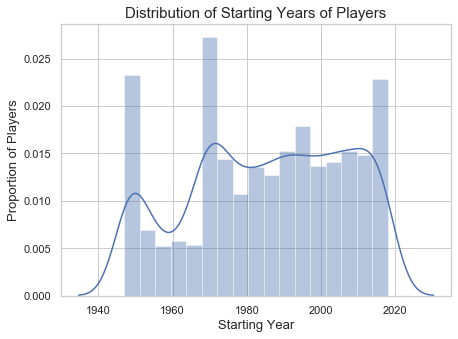

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.distplot(college['active_from'], kde=True, ax=ax)

ax.set_xlabel('Starting Year', fontsize=13)
ax.set_ylabel('Proportion of Players', fontsize=13)
ax.set_title('Distribution of Starting Years of Players', fontsize=15);

I noticed three spikes immediately! Was this data accurate or was there an issue inputting it? I decided to check where the spikes were from. We see a spike at 1947/1950, 1968, and 2018. 

In [7]:
college['active_from'].value_counts().sort_values(ascending=False)

1968    173
1947    161
1950    120
2018    116
1971    100
       ... 
1966     23
1964     23
1958     21
1961     20
1960     19
Name: active_from, Length: 72, dtype: int64

I decided to sample players from 1968, and they seemed correct. Googling I learned that during the [1967-68 in the NBA](https://en.wikipedia.org/wiki/1967%E2%80%9368_NBA_season), there were two new clubs the Seattle SuperSonics and San Diego Rockets.

In [8]:
college[college['active_from']==1968].sample(10)

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
2588,1968,1968,"July 14, 1943",Savannah State University,6-6,Johnny Mathis,F,/players/m/mathijo01.html,220.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463,1968,1976,"January 2, 1942",Saint Mary of the Plains College,6-10,Gerald Govan,F-C,/players/g/govange01.html,220.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,1968,1968,"June 17, 1940",University of Portland,6-10,Bill Garner,C,/players/g/garnebi01.html,220.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3350,1968,1969,"June 21, 1941",Indiana University,6-2,Jimmy Rayl,G,/players/r/raylji01.html,175.0,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,1968,1968,"July 29, 1943",Wilberforce University,6-1,Al Jackson,G,/players/j/jacksal01.html,185.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,1968,1968,"September 15, 1943",Grambling State University,6-5,John Comeaux,F,/players/c/comeajo01.html,193.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,1968,1973,"June 30, 1943",North Carolina Agricultural and Technical Stat...,6-6,Warren Davis,F-C,/players/d/daviswa02.html,212.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2165,1968,1969,"June 13, 1944",University of Florida,6-9,Gary Keller,F-C,/players/k/kellega01.html,220.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,1968,1969,"January 28, 1943",Georgia Institute of Technology,6-10,Jim Caldwell,C,/players/c/caldwji01.html,240.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,1968,1980,"November 21, 1944",Winston-Salem State University,6-3,Earl Monroe,G,/players/m/monroea01.html,185.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 1947 spike was due to the Basketball Association of America (BAA) being created in the [1946-1947 season](https://en.wikipedia.org/wiki/1946%E2%80%9347_BAA_season).

The 1950 spike was due to the National Basketball Association (NBA) being created in the [1949-1950 season](https://en.wikipedia.org/wiki/1949%E2%80%9350_NBA_season).

I did not find any explamation for 2018, but I suspect the spike was because it was the last date inputted into this dataset.

Now we can look at the nan values. First I sampled nan college values and look at their distribution for starting year. 

Looking at their fields, most of them are also nan. Looking at the distribution they are mostly 1990 and beyond. I will drop these players since there are only 300 of them and their distribution does not seem to have a big bias to the dataset population.

In [9]:
college_nan = college[college['college'].isna()]
college_nan.sample(10)

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
898,1999,2001,"October 22, 1971",NaN,6-9,Kornel David,F,/players/d/davidko01.html,235.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,1998,2000,"January 1, 1975",NaN,7-0,Chris Anstey,C,/players/a/anstech01.html,249.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,2011,2012,"June 22, 1989",NaN,6-5,Christian Eyenga,F,/players/e/eyengch01.html,210.0,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3921,1999,2005,"February 10, 1980",NaN,7-2,Bruno Sundov,C,/players/s/sundobr01.html,220.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053,2015,2015,"June 22, 1989",NaN,6-5,Zoran Dragic,G-F,/players/d/dragizo01.html,200.0,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3545,1996,2003,"December 19, 1964",NaN,7-3,Arvydas Sabonis,C,/players/s/sabonar01.html,279.0,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1356,2007,2008,"December 19, 1977",NaN,6-9,Jorge Garbajosa,F,/players/g/garbajo01.html,245.0,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,2002,2013,"March 10, 1982",NaN,6-11,Kwame Brown,F,/players/b/brownkw01.html,270.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3707,1947,1956,"March 15, 1925",NaN,6-8,Connie Simmons,C-F,/players/s/simmoco01.html,222.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2299,2005,2005,"July 1, 1974",NaN,6-6,Ibo Kutluay,G,/players/k/kutluib01.html,200.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


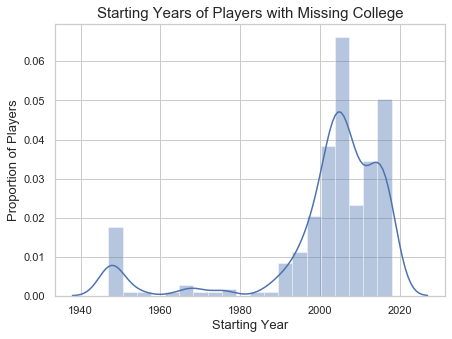

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.distplot(college_nan['active_from'], kde=True, ax=ax)

ax.set_xlabel('Starting Year', fontsize=13)
ax.set_ylabel('Proportion of Players', fontsize=13)
ax.set_title('Starting Years of Players with Missing College', fontsize=15);

Next, I looked at players that were missing `NCAA_games` guessing that the rest of the `NCAA` fields would be nan. This was correct.

The distribution looks to be more common pre 1980 so it's likely data was not collected then. If this is the case, the NCAA data should be close to dataset population data and it is ok to drop them.

In [11]:
college_NCAA_nan = college[college['NCAA_games'].isna()]
college_NCAA_nan.sample(10)

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
1297,1952,1952,"June 20, 1927",University of Missouri,6-8,Jerry Fowler,C,/players/f/fowleje01.html,230.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2367,1967,1976,"March 14, 1944",Vanderbilt University,6-10,Clyde Lee,F-C,/players/l/leecl01.html,205.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3097,2001,2003,"May 11, 1981",NaN,6-10,Olumide Oyedeji,C,/players/o/oyedeol01.html,240.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2773,1969,1975,"April 4, 1946",University of North Carolina,6-4,Larry Miller,G-F,/players/m/millela01.html,190.0,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2450,1972,1974,"March 1, 1950",University of New Mexico,6-8,Willie Long,F-C,/players/l/longwi01.html,225.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,2003,2018,"September 13, 1982",NaN,6-11,Nene Hilario,F-C,/players/h/hilarne01.html,250.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3485,1949,1953,"September 14, 1923",University of Kentucky,6-0,Kenny Rollins,G,/players/r/rollike01.html,168.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3987,1970,1970,"September 5, 1944",Kentucky State University,6-1,Floyd Theard,G,/players/t/thearfl01.html,170.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,1968,1969,"January 16, 1945",Indiana University,6-4,Ervin Inniger,G,/players/i/inniger01.html,190.0,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,1979,1979,"May 21, 1954",University of Detroit Mercy,6-1,Dennis Boyd,G,/players/b/boydde01.html,175.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


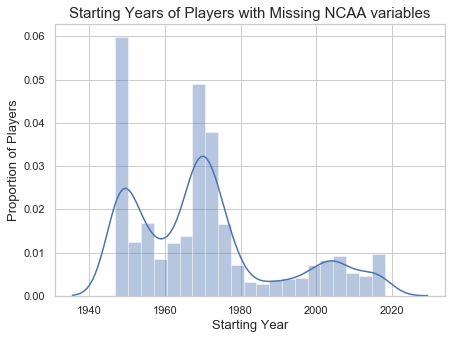

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.distplot(college_NCAA_nan['active_from'], kde=True, ax=ax)

ax.set_xlabel('Starting Year', fontsize=13)
ax.set_ylabel('Proportion of Players', fontsize=13)
ax.set_title('Starting Years of Players with Missing NCAA variables', fontsize=15);

Finally, I looked at players that were missing `NBA_3ptapg` field to see if their `3pt` fields would also be nan. This was also correct.

The distribution has a spike at 1950 meaning it was likely not recorded then. Since this field was in the NBA, dropping players missing this field would drop a lot of players with NBA stats. Instead I choose to drop the columns of `3pt` stats.

In [13]:
college_3pt_nan = college[college['NBA__3ptapg'].isna()]
college_3pt_nan.sample(10)

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
2211,1955,1955,"January 7, 1931",Western Kentucky University,6-6,Dan King,F,/players/k/kingda01.html,220.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4557,1953,1955,"October 13, 1930",St. John's University,6-7,Zeke Zawoluk,F-C,/players/z/zawolze01.html,215.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3228,1957,1963,"August 27, 1934",Xavier University,6-6,Dave Piontek,F-C,/players/p/piontda01.html,230.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,1949,1949,"June 4, 1922",Washington State University,6-3,Gale Bishop,F,/players/b/bishoga01.html,195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,1953,1964,"November 10, 1930",Washington State University,6-8,Gene Conley,C-F,/players/c/conlege01.html,225.0,NaN,...,NaN,NaN,NaN,NaN,4.7,0.711,5.6,4.0,32.0,13.3
2133,1947,1947,"September 2, 1920",Ohio State University,6-5,Roger Jorgensen,C-F,/players/j/jorgero01.html,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,1964,1964,"December 30, 1940",Western Carolina University,6-3,Mel Gibson,G,/players/g/gibsome01.html,180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4141,1947,1950,"October 28, 1922",New York University,6-3,Butch van Breda Kolff,G-F,/players/v/vanbrbu01.html,185.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,1950,1958,"May 23, 1924",University of Louisville,6-7,Jack Coleman,F-C,/players/c/colemja01.html,195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,1958,1958,"October 29, 1931",University of Minnesota,6-4,Doug Bolstorff,G,/players/b/bolstdo01.html,195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


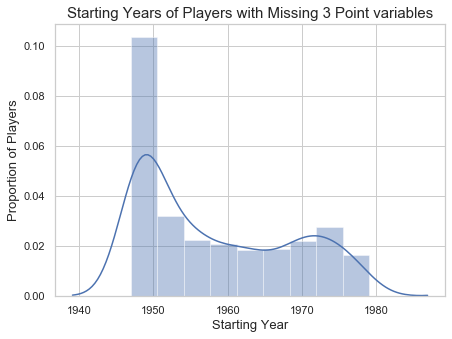

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.distplot(college_3pt_nan['active_from'], kde=True, ax=ax)

ax.set_xlabel('Starting Year', fontsize=13)
ax.set_ylabel('Proportion of Players', fontsize=13)
ax.set_title('Starting Years of Players with Missing 3 Point variables', fontsize=15);

Here we have functions that drop the columns and players with nan values specified. When we're done we don't have any more nan's! Yay!

In [15]:
def drop_columns(df):
    '''
    drops columns with `3pt`, `efgpct`, `birth_date`, and `url` from the DataFrame
    '''
    
    def drop(column):
        if '3pt' in column:
            return True
        elif 'efgpct' in column:
            return True
        elif 'birth_date' in column:
            return True
        elif 'url' in column:
            return True
        return False

    df_cleaned = df[
        [column for column in df.columns if not drop(column)]
    ]
    return df_cleaned

def drop_nan(df):
    '''
    drops players with nan fields
    '''
    df_cleaned = df.dropna()
    return df_cleaned

college_temp = drop_columns(college)
college_no_nan = drop_nan(college_temp)
college_no_nan.isnull().sum()

active_from         0
active_to           0
college             0
height              0
name                0
position            0
weight              0
NBA_fg%             0
NBA_fg_per_game     0
NBA_fga_per_game    0
NBA_ft%             0
NBA_ft_per_g        0
NBA_fta_p_g         0
NBA_g_played        0
NBA_ppg             0
NCAA_fgapg          0
NCAA_fgpct          0
NCAA_fgpg           0
NCAA_ft             0
NCAA_ftapg          0
NCAA_ftpg           0
NCAA_games          0
NCAA_ppg            0
dtype: int64

Next, we look for players from Berkeley. Unfortunately there are actually under the `University of California`. We will have to fix this.

In [16]:
college_no_nan[college_no_nan['college'].str.contains('^University of California$', na=False)].head(5)

,active_from,active_to,college,height,name,position,weight,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,...,NBA_g_played,NBA_ppg,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
5,1997,2008,University of California,6-9,Shareef Abdur-Rahim,F,225.0,0.472,6.5,13.9,...,830,18.1,14.2,0.518,7.4,0.683,8.9,6.1,28.0,21.1
96,2009,2018,University of California,6-10,Ryan Anderson,F,240.0,0.423,4.4,10.4,...,622,12.8,13.1,0.484,6.3,0.841,5.0,4.2,66.0,18.7
324,2018,2018,University of California,6-6,Jabari Bird,G,197.0,0.632,1.1,1.7,...,11,2.6,8.9,0.442,3.9,0.753,1.6,1.2,114.0,10.8
498,2017,2018,University of California,6-7,Jaylen Brown,F-G,225.0,0.461,3.8,8.2,...,147,10.2,11.1,0.431,4.8,0.654,6.4,4.2,34.0,14.6
689,1972,1981,University of California,6-3,Phil Chenier,G,180.0,0.444,7.1,16.0,...,578,17.2,13.7,0.412,5.6,0.683,3.3,2.2,51.0,13.5


Another thing I found looking at the `college` column was that some players played at multiple schools and the schools are seperated by a comma. We can fix this by "exploding the college column" and creating a different row for each college.

In [17]:
college_no_nan[college_no_nan['college'].str.contains(',', na=False)].head(5)

,active_from,active_to,college,height,name,position,weight,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,...,NBA_g_played,NBA_ppg,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
2,1970,1989,"University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,225.0,0.559,10.2,18.1,...,1560,24.6,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
19,2015,2016,"University of California, Los Angeles",6-5,Jordan Adams,G,209.0,0.402,1.2,2.9,...,32,3.2,11.6,0.467,5.4,0.839,5.0,4.2,69.0,16.4
26,2008,2018,"University of California, Los Angeles",6-5,Arron Afflalo,G,210.0,0.449,3.9,8.7,...,761,10.8,10.9,0.457,5.0,0.781,3.6,2.8,104.0,14.8
41,1985,1985,"University of Kentucky, University of Connecticut",6-11,Chuck Aleksinas,C,260.0,0.478,2.2,4.6,...,74,5.1,6.8,0.561,3.8,0.721,3.5,2.5,96.0,10.1
44,2001,2003,"University of Virginia, California State Unive...",6-5,Courtney Alexander,G,205.0,0.422,3.5,8.3,...,187,9.0,15.8,0.456,7.2,0.767,3.9,3.0,112.0,18.9


I apply the University of California fix, the multiple colleges fix, strip whitespace on college, add height in inches, and also change the position to basic position like we did in lab 11.

In [18]:
def fix_university_of_california(df):
    '''
    Changes `University of California,` to `University of California:`
    Changes `University of California` to `University of California: Berkeley`
    '''
    df = df.copy()
    df['college'] = df['college'].str.replace('^University of California$', 'University of California, Berkeley')
    df['college'] = df['college'].str.replace('University of California,', 'University of California:')
    return df

def explode_college_index(df):
    '''
    Create player rows for each college for players that play in multiple colleges 
    '''
    df = df.copy()
    df['college'] = df['college'].str.split(',')
    df_exploded = df.explode('college')
    return df_exploded

def strip_space_college(df):
    '''
    Strips whitespace before and after text on the college field
    '''
    df = df.copy()
    df['college'] = df['college'].str.strip()
    return df

def add_height_inches(df):
    '''
    Changes height (type: object) into height_inches (type: float)
    Moves weight to beside height.
    '''
    
    def to_inches(height):
        feet, inches = str(height).split('-')
        return 12 * float(feet) + float(inches)
    df = df.copy()
    df['height_inches'] = df['height'].apply(to_inches)
    df.pop('height')
    df['weight'] = df.pop('weight')
    return df

def set_basic_position(df):
    '''
    Replace position with basic position
    '''
    def basic_position(pos):
        if 'F' in pos:
            return 'Forward'
        elif 'G' in pos:
            return 'Guard'
        return 'Center'
    
    df = df.copy()
    df['position'] = df['position'].apply(basic_position)
    return df

college_temp = fix_university_of_california(college_no_nan)
college_temp = explode_college_index(college_temp)
college_temp = strip_space_college(college_temp)
college_temp = add_height_inches(college_temp)
college_clean = set_basic_position(college_temp)

college_clean

,active_from,active_to,college,name,position,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,NBA_ft%,NBA_ft_per_g,...,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,height_inches,weight
0,1991,1995,Duke University,Alaa Abdelnaby,Forward,0.502,2.4,4.8,0.701,0.9,...,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5,82.0,240.0
2,1970,1989,University of California: Los Angeles,Kareem Abdul-Jabbar,Center,0.559,10.2,18.1,0.721,4.3,...,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4,86.0,225.0
3,1991,2001,Louisiana State University,Mahmoud Abdul-Rauf,Guard,0.442,6.0,13.6,0.905,1.8,...,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0,73.0,162.0
5,1997,2008,University of California: Berkeley,Shareef Abdur-Rahim,Forward,0.472,6.5,13.9,0.810,4.8,...,14.2,0.518,7.4,0.683,8.9,6.1,28.0,21.1,81.0,225.0
6,1977,1981,Indiana University,Tom Abernethy,Forward,0.492,2.3,4.6,0.747,1.0,...,4.5,0.533,2.4,0.689,1.7,1.1,110.0,5.9,79.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,1988,1988,Seattle Pacific University,Phil Zevenbergen,Center,0.556,1.9,3.4,0.000,0.0,...,7.6,0.501,3.8,0.721,3.5,2.5,66.0,10.1,82.0,230.0
4565,1988,1988,University of Washington,Phil Zevenbergen,Center,0.556,1.9,3.4,0.000,0.0,...,7.6,0.501,3.8,0.721,3.5,2.5,66.0,10.1,82.0,230.0
4567,1996,1998,University of California: Los Angeles,George Zidek,Center,0.408,1.2,2.9,0.783,1.0,...,5.4,0.520,2.8,0.744,2.1,1.5,104.0,7.1,84.0,250.0
4569,2017,2017,University of Nevada,Stephen Zimmerman,Center,0.323,0.5,1.6,0.600,0.2,...,8.2,0.477,3.9,0.624,3.9,2.4,26.0,10.5,84.0,240.0


Our data is now clean!

# Part 2: Schools to the NBA

Let's answer our second question: What school produces the most NBA players?

In [19]:
players_per_college = college_clean.groupby('college').size().sort_values(ascending=False)
players_per_college

college
University of California: Los Angeles    79
University of Kentucky                   76
University of North Carolina             72
Duke University                          58
University of Kansas                     57
                                         ..
Seward County Community College           1
Seattle Pacific University                1
Gardner-Webb University                   1
San Luis Obispo                           1
Alabama A&M University                    1
Length: 278, dtype: int64

From our data, the answer to the second question is __Q2: University of California: Los Angeles has the most player in the NBA with 79 players.__

Doing some [googling](https://www.tiebreaker.com/colleges-universities-produce-most-nba-players/), as of 2019, the __University of Kentucky is the most with 111 players__ in the NBA and UCLA is second with 98 players. Our data has some bias from dropping players in cleaning.

Now let's see if we can compare schools like Berkeley and Kansas. I want to group these schools up by how many players they send to the NBA. First, we can look at the distribution of colleges and the numbers of players they send to the NBA.

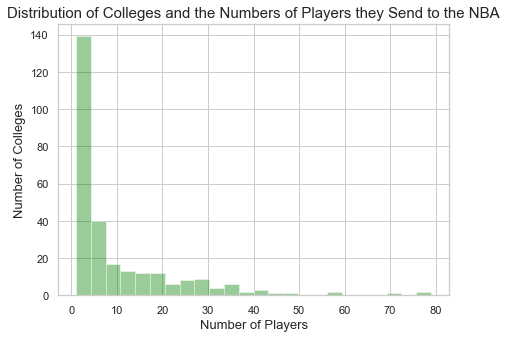

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.distplot(players_per_college, kde=False, ax=ax, color='green')

ax.set_xlabel('Number of Players', fontsize=13)
ax.set_ylabel('Number of Colleges', fontsize=13)
ax.set_title('Distribution of Colleges and the Numbers of Players they Send to the NBA', fontsize=15);

We see the distribution is heavily skewed right. Most colleges send 1 or a few players to the NBA and few colleges send many people, 70+.

Let's compare the number of people Berkeley and Kansas send.

In [21]:
players_per_college['University of California: Berkeley']

20

In [22]:
players_per_college['University of Kansas']

57

Berkeley is in the middle of the pack with 20 players in the NBA. Kansas is at the top with 57 players in the NBA! To compare schools like Berkeley and schools like Kansas, let's create a function that adds a school popularity field. A school is `high` popularity if it has greater than 30 players in the NBA, a school is `medium` popularity if it has between 11 and 30 players in the NBA, and a school is `low` popularity if it has 15 or less players in the NBA.

We see the groups each have about 900 students.

In [23]:
def add_school_popularity(df):
    '''
    Adds field that classifies the school's popularity in the NBA.
    `high` is greater than 30 players from that school
    `medium` is between 16 and 30
    `low` is less than or equal to 15
    '''
    def school_popularity(college):
        num_players = players_per_college[college]
        if num_players > 30:
            return 'High'
        elif num_players > 15:
            return 'Medium'
        else:
            return 'Low'
    df = df.copy()
    df['school_popularity'] = df['college'].apply(school_popularity)
    return df

add_school_popularity(college_clean)['school_popularity'].value_counts()

High      969
Medium    907
Low       893
Name: school_popularity, dtype: int64

Let's also add a tenure field to see how long a player has played in the NBA.

In [24]:
def add_tenure(df):
    '''
    Adds field of how long a player has played in the NBA
    '''
    df.copy()
    df.insert(0, 'NBA_tenure', df['active_to'] - df['active_from'])
    return df

college_temp = add_school_popularity(college_clean)
college_extended = add_tenure(college_temp)
college_extended

,NBA_tenure,active_from,active_to,college,name,position,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,NBA_ft%,...,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,height_inches,weight,school_popularity
0,4,1991,1995,Duke University,Alaa Abdelnaby,Forward,0.502,2.4,4.8,0.701,...,0.599,3.3,0.728,2.5,1.8,134.0,8.5,82.0,240.0,High
2,19,1970,1989,University of California: Los Angeles,Kareem Abdul-Jabbar,Center,0.559,10.2,18.1,0.721,...,0.639,10.7,0.628,7.9,5.0,88.0,26.4,86.0,225.0,High
3,10,1991,2001,Louisiana State University,Mahmoud Abdul-Rauf,Guard,0.442,6.0,13.6,0.905,...,0.474,10.4,0.863,6.4,5.5,64.0,29.0,73.0,162.0,High
5,11,1997,2008,University of California: Berkeley,Shareef Abdur-Rahim,Forward,0.472,6.5,13.9,0.810,...,0.518,7.4,0.683,8.9,6.1,28.0,21.1,81.0,225.0,Medium
6,4,1977,1981,Indiana University,Tom Abernethy,Forward,0.492,2.3,4.6,0.747,...,0.533,2.4,0.689,1.7,1.1,110.0,5.9,79.0,220.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,0,1988,1988,Seattle Pacific University,Phil Zevenbergen,Center,0.556,1.9,3.4,0.000,...,0.501,3.8,0.721,3.5,2.5,66.0,10.1,82.0,230.0,Low
4565,0,1988,1988,University of Washington,Phil Zevenbergen,Center,0.556,1.9,3.4,0.000,...,0.501,3.8,0.721,3.5,2.5,66.0,10.1,82.0,230.0,Medium
4567,2,1996,1998,University of California: Los Angeles,George Zidek,Center,0.408,1.2,2.9,0.783,...,0.520,2.8,0.744,2.1,1.5,104.0,7.1,84.0,250.0,High
4569,0,2017,2017,University of Nevada,Stephen Zimmerman,Center,0.323,0.5,1.6,0.600,...,0.477,3.9,0.624,3.9,2.4,26.0,10.5,84.0,240.0,High


We can compare the different classes of school popularity to their tenure in the NBA! From our boxplot, each class has about the same median tenure, around 4-5 years in the NBA.

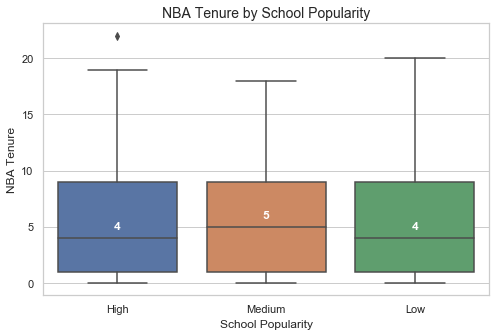

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
medians = college_extended \
    .groupby(['school_popularity'])['NBA_tenure'] \
    .median() \
    .reindex(['High', 'Medium', 'Low'])

vertical_offset = college_extended['NBA_tenure'].median() * 0.2

chart = sns.boxplot(x='school_popularity', y='NBA_tenure', data=college_extended, ax=ax)

for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center', size='large', color='w', weight='semibold')


chart.set_title('NBA Tenure by School Popularity', fontsize=14)
chart.set_xlabel('School Popularity', fontsize=12)
chart.set_ylabel('NBA Tenure', fontsize=12);

We can also answer our third question, What school produces the longest tenured players?

In [26]:
tenure_by_school = college_extended \
    .groupby(['college'])['NBA_tenure'] \
    .mean() \
    .sort_values(ascending=False)
tenure_by_school

college
Gardner-Webb University                16.0
Centenary College of Louisiana         15.5
Southern University and A&M College    15.0
Cameron University                     14.5
American University                    14.0
                                       ... 
Utah State University                   0.0
Thomas More College                     0.0
University of Wisconsin-Green Bay       0.0
Stony Brook University                  0.0
Alabama A&M University                  0.0
Name: NBA_tenure, Length: 278, dtype: float64

The schools we get are pretty uncommon. It's likely these schools only have 1 or 2 players in the NBA and that can skew our average tenure. Instead, let's look only at the schools with at least 3 players.

In [27]:
greater_than_3_players = lambda college: players_per_college[college] > 3
college_extended[college_extended['college'].apply(greater_than_3_players)] \
    .groupby(['college'])['NBA_tenure'] \
    .mean() \
    .sort_values(ascending=False)

college
Louisiana Tech University                    10.600000
University of Detroit Mercy                   9.250000
Seattle University                            9.250000
Creighton University                          9.125000
Clemson University                            9.000000
                                               ...    
University of North Carolina at Charlotte     2.000000
Loyola Marymount University                   1.833333
Northern Illinois University                  1.666667
University of Alabama at Birmingham           0.571429
Loyola University of Chicago                  0.000000
Name: NBA_tenure, Length: 157, dtype: float64

__Q3: Overall, Gardner-Webb University with an average tenure of 16 years. For colleges with at least 3 players, Louisiana Tech University with a average tenure of 10.6 years.__

Now let's continue on comparing our three classes of school popularity. We can begin looking at a pairplot for the NCAA basketball statistics.

/Users/btl787/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


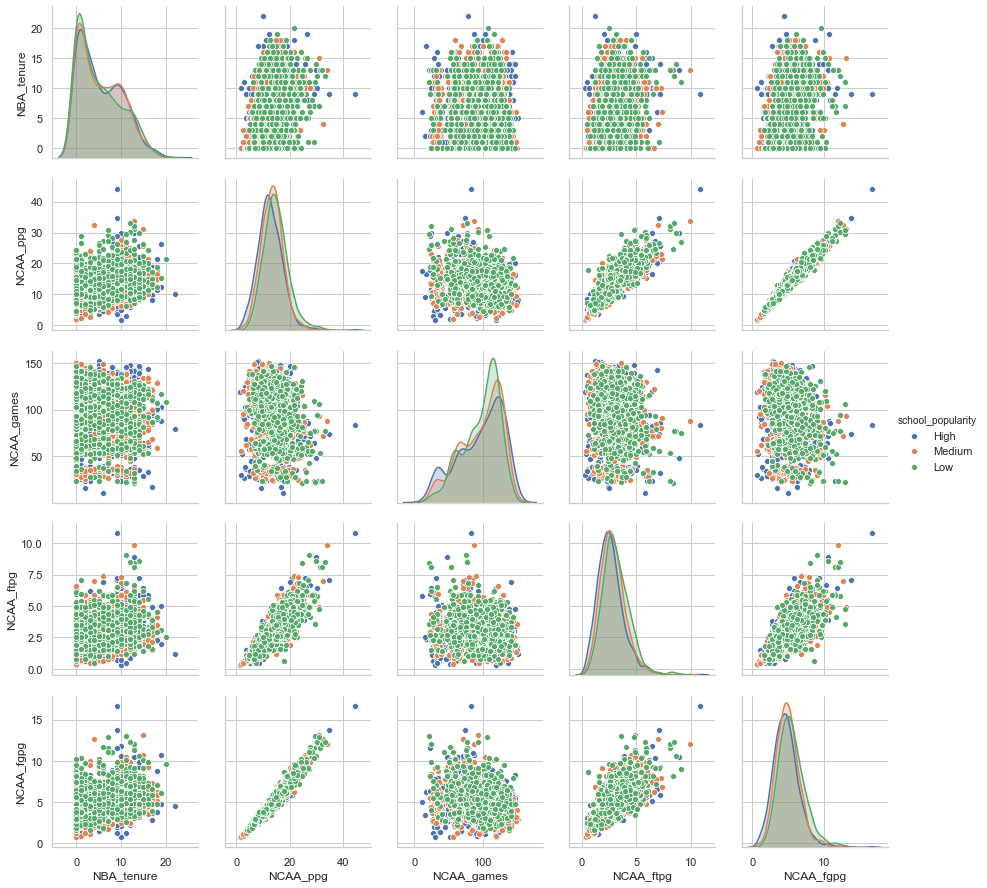

In [28]:
sns.pairplot(college_extended[['NBA_tenure', 'NCAA_ppg', 'NCAA_games', 'NCAA_ftpg', 'NCAA_fgpg', 'school_popularity']], hue='school_popularity', palette=sns.color_palette())

Some things I noticed: `NCAA_ppg` and `NCAA_fgpg` have a strong correlation. This makes sense; the more field goals (2 and 3 pointers) you make the more points you score. `NCAA_ppg` and `NCAA_ftpg` have a moderate correlation. Again the more free throws you make, the more points you score.

When we look at the school popularity distributions, they all seem to about the same.

Now we can compare these stats from the NBA.

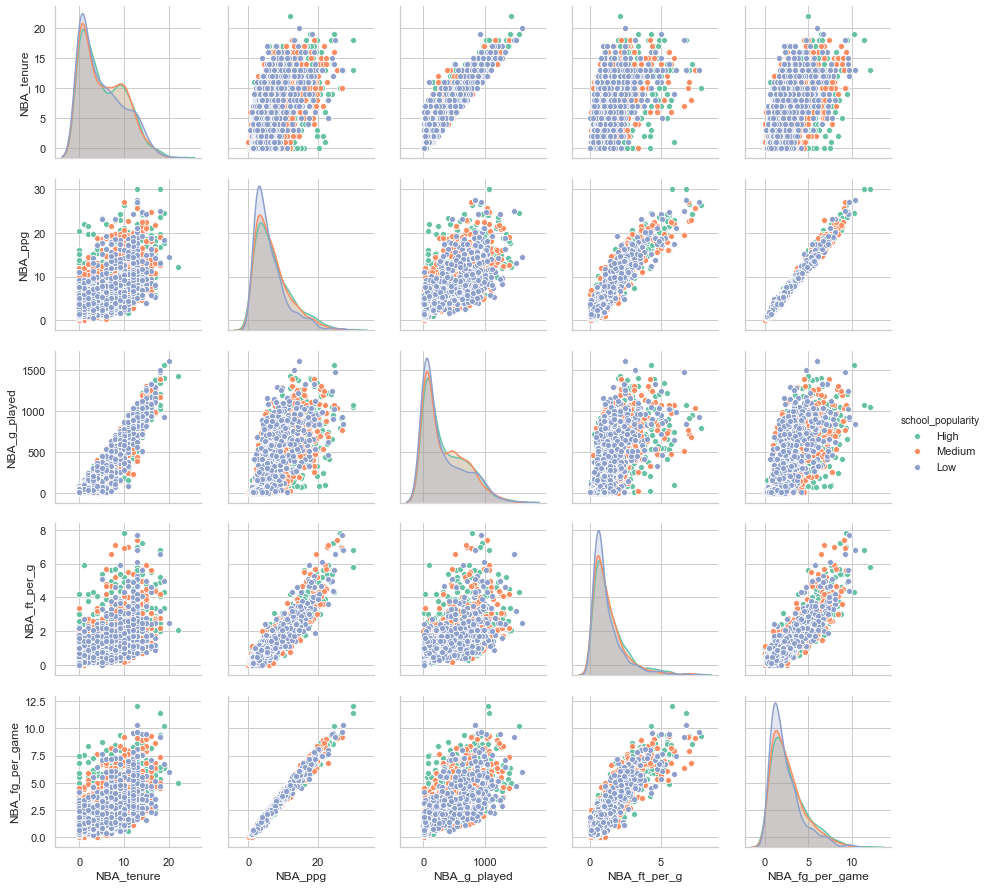

In [29]:
sns.pairplot(college_extended[['NBA_tenure', 'NBA_ppg', 'NBA_g_played', 'NBA_ft_per_g', 'NBA_fg_per_game', 'school_popularity']], hue='school_popularity', palette=sns.color_palette("Set2"))

Again we see a strong relationship between `NBA_ppg` and `NBA_fg_per_g` and a moderate correlation between `NBA_ppg` and `NBA_ft_per_g`. We also see a moderate correlation between `NBA_tenure` and `NBA_g_played` which makes sense; the more seasons you play, the more games you play.

Again, school popularity all have the same distribution.

Finally, we can look at a pairplot between NBA and NCAA statistics.

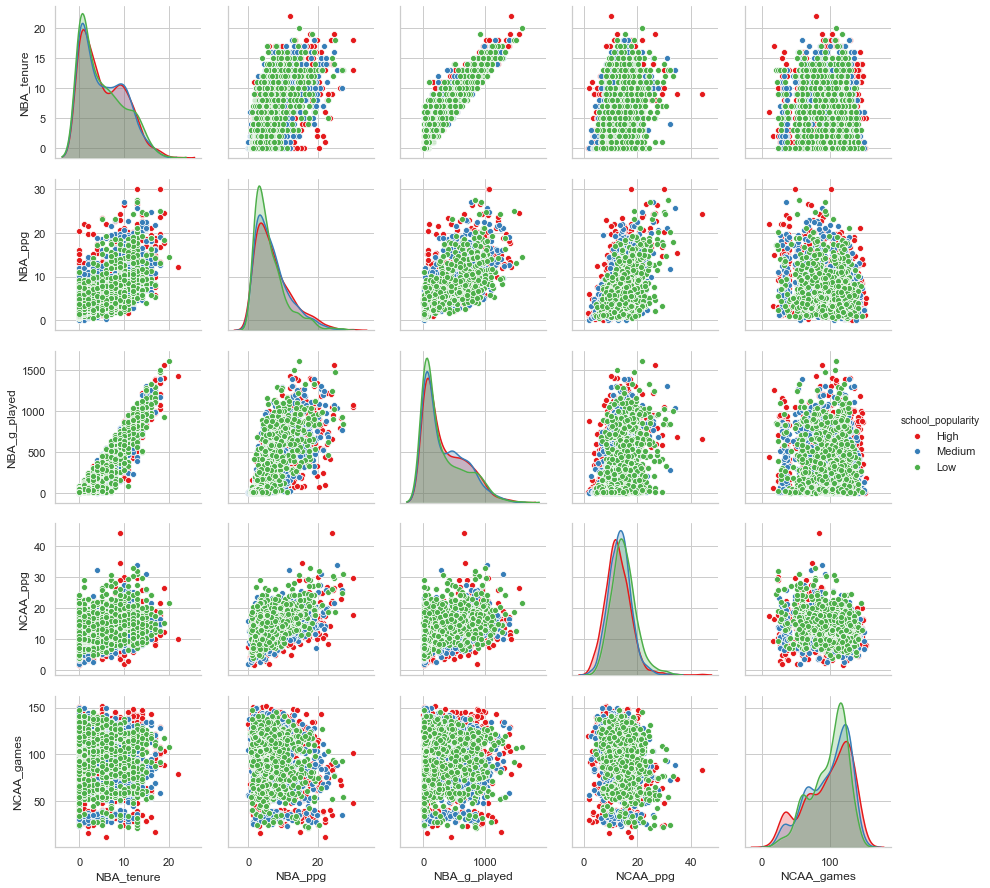

In [30]:
sns.pairplot(college_extended[['NBA_tenure', 'NBA_ppg', 'NBA_g_played', 'NCAA_ppg', 'NCAA_games', 'school_popularity']], hue='school_popularity', palette=sns.color_palette("Set1"))

I don't see anything except the moderate correlation between `NBA_tenure` and `NBA_g_played` again.

Let's look at the median NBA points scored by school popularity to compare them.

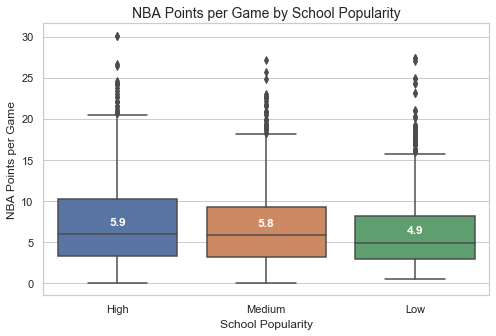

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
medians = college_extended \
    .groupby(['school_popularity'])['NBA_ppg'] \
    .median() \
    .reindex(['High', 'Medium', 'Low'])

vertical_offset = college_extended['NBA_ppg'].median() * 0.2

chart = sns.boxplot(x='school_popularity', y='NBA_ppg', data=college_extended, ax=ax)

for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center', size='large', color='w', weight='semibold')


chart.set_title('NBA Points per Game by School Popularity', fontsize=14)
chart.set_xlabel('School Popularity', fontsize=12)
chart.set_ylabel('NBA Points per Game', fontsize=12);

High and Medium have the same median around 5.9 points, but Low popularity schools have a median around 4.9 points. We do see a lot of outliers for all three classes.

We can also compare them for the NCAA.

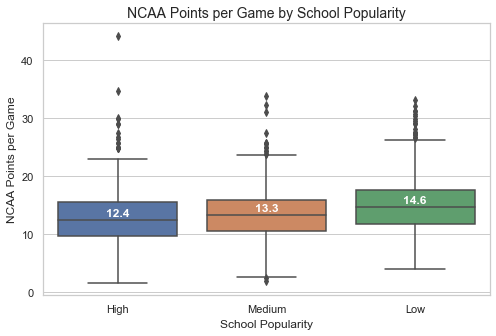

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
medians = college_extended \
    .groupby(['school_popularity'])['NCAA_ppg'] \
    .median() \
    .reindex(['High', 'Medium', 'Low'])

vertical_offset = college_extended['NCAA_ppg'].median() * 0.05

chart = sns.boxplot(x='school_popularity', y='NCAA_ppg', data=college_extended, ax=ax)

for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center', size='large', color='w', weight='semibold')


chart.set_title('NCAA Points per Game by School Popularity', fontsize=14)
chart.set_xlabel('School Popularity', fontsize=12)
chart.set_ylabel('NCAA Points per Game', fontsize=12);

There are two suprising things here! First, all three classes score way more points than in the NBA! I would suspect the number of points to have been the same. One hypothesis is NCAA players get more play time and have fewer players, therefore are able to score more points.

The second surprising thing is that the low class has the highest median points per game at 14.6, then Medium at 13.3, and finally high at 12.4. My hypothesis is that for a player to come from a low popularity school, they have to be very good to be able to make it to the NBA. Second, they might become the main scorer on their team and be able to score more points than if they came from a popular school with multiple super stars.

Let's look at player positions next.

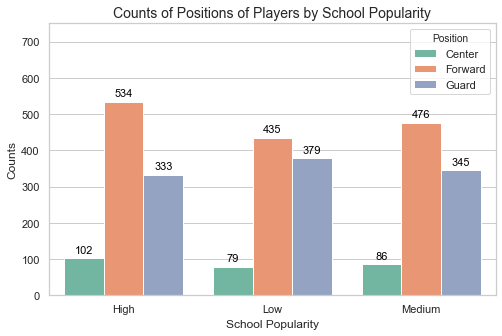

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))

grouped_college_basic_position = college_extended \
    .groupby(['school_popularity', 'position']) \
    .size() \
    .reset_index() \

chart = sns.barplot(x='school_popularity', y=0, hue='position', data=grouped_college_basic_position,
                    ax=ax, palette=sns.color_palette("Set2")[:3])

chart.set_ybound(upper=750)
chart.set_title('Counts of Positions of Players by School Popularity', fontsize=14)
chart.set_xlabel('School Popularity', fontsize=12)
chart.set_ylabel('Counts', fontsize=12)
chart.get_legend().set_title('Position')

for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                textcoords='offset points');

For each of the classes of school popularity, the distribution of player positions is about the same. Each school popularity has most forwards, guards second , and centers last.

Let's look at the points per game for these positions and school popularities.

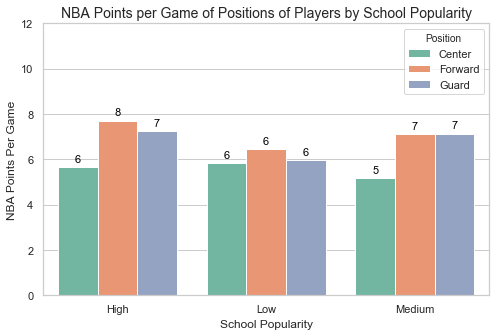

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))

grouped_college_basic_position = college_extended \
    .groupby(['school_popularity', 'position']) \
    ['NBA_ppg'].mean() \
    .reset_index() \

chart = sns.barplot(x='school_popularity', y='NBA_ppg', hue='position', data=grouped_college_basic_position, ax=ax, palette=sns.color_palette("Set2")[:3])

chart.set_ybound(upper=12)
chart.set_title('NBA Points per Game of Positions of Players by School Popularity', fontsize=14)
chart.set_xlabel('School Popularity', fontsize=12)
chart.set_ylabel('NBA Points Per Game', fontsize=12)
chart.get_legend().set_title('Position')

for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                textcoords='offset points');

Again, the school popularity distributions look about the same for the different positions. Forwards do score the most number of points.

Finally, we can look at the height and weight of NBA players and their school popularities.

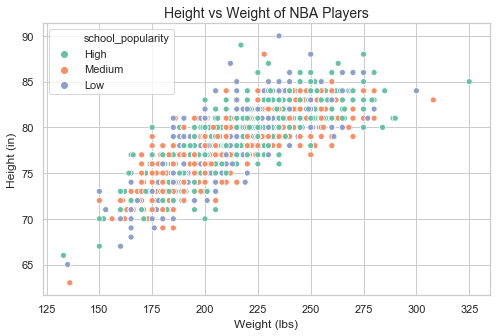

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
chart = sns.scatterplot(x='weight', y='height_inches', hue='school_popularity', data=college_extended, ax=ax, palette=sns.color_palette("Set2")[:3])

chart.set_title('Height vs Weight of NBA Players', fontsize=14)
chart.set_xlabel('Weight (lbs)', fontsize=12)
chart.set_ylabel('Height (in)', fontsize=12);

We see a correlation between weight and height but no relationship with school popularity.

To answer our first question, __Q1: There is no significant difference between highly popular schools like Kansas and medium popular schools like Berkeley. When a player gets to the NBA, they are all very good. Players from less popular and medium popular schools may score more points in the NCAA, to reach the same level as players from high popularity schools.__

# Part 3: Predicting Tenure

Now let's see if can predict tenure from a player's statistics in college. Tenure is one measure of how good a player is because if the player is a strong player they will continue to have a long career.

First, let plot the distribution of NBA tenure.

/Users/btl787/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


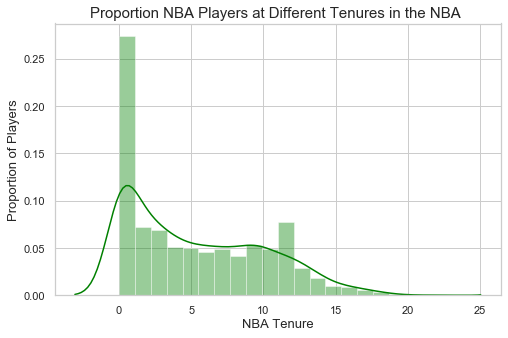

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.distplot(college_extended['NBA_tenure'], kde=True, ax=ax, color='green')

ax.set_xlabel('NBA Tenure', fontsize=13)
ax.set_ylabel('Proportion of Players', fontsize=13)
ax.set_title('Proportion NBA Players at Different Tenures in the NBA ', fontsize=15);

The disribution has a peak at 0 and is right skewed. Most players do not last that long in the NBA. Those with very long careers, are probably super stars. Let's look at the columns to see what features we can use.

In [37]:
college_extended.columns

Index(['NBA_tenure', 'active_from', 'active_to', 'college', 'name', 'position',
       'NBA_fg%', 'NBA_fg_per_game', 'NBA_fga_per_game', 'NBA_ft%',
       'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA_g_played', 'NBA_ppg', 'NCAA_fgapg',
       'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg', 'height_inches', 'weight',
       'school_popularity'],
      dtype='object')

What features might predict NBA tenure? Some guesses are:

* `school_popularity`: players from good schools will have longer careers
* `NCAA_ppg`: players that score more will have longer careers
* `active_from`: maybe players from certain eras (when basketball is popular) have long careers
* `NCAA_games`: players that play a lot will do well and have long careers
* `height`: tall players are always needed and will have long careers

Let's analyze the first hypothesis. We plot the distribution for each school popularity class.

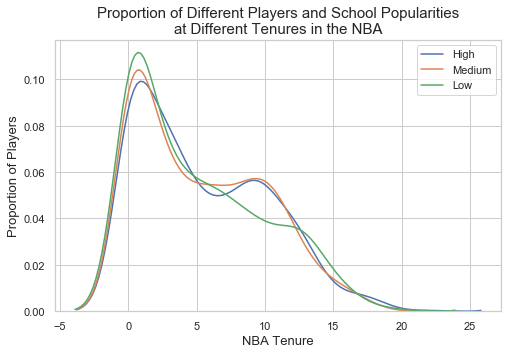

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.distplot(college_extended['NBA_tenure'][college_extended['school_popularity']=='High'], hist=False, kde=True, ax=ax, label='High')
sns.distplot(college_extended['NBA_tenure'][college_extended['school_popularity']=='Medium'], hist=False, kde=True, ax=ax, label='Medium')
sns.distplot(college_extended['NBA_tenure'][college_extended['school_popularity']=='Low'], hist=False, kde=True, ax=ax, label='Low')

ax.set_xlabel('NBA Tenure', fontsize=13)
ax.set_ylabel('Proportion of Players', fontsize=13)
ax.set_title('Proportion of Different Players and School Popularities\nat Different Tenures in the NBA', fontsize=15);

The distribution for all three classes seem the same. Most players in each class have short tenures, but some become superstars and have long tenures.

Next let's examine points in the NCAA.

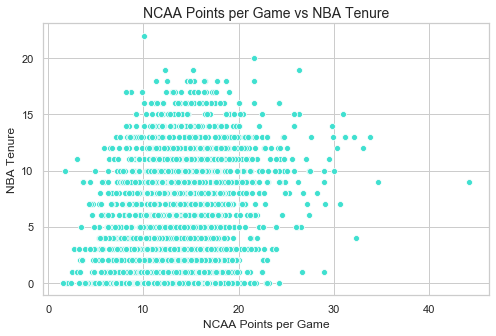

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
chart = sns.scatterplot(x='NCAA_ppg', y='NBA_tenure', data=college_extended, ax=ax, color='turquoise')

chart.set_title('NCAA Points per Game vs NBA Tenure', fontsize=14)
chart.set_xlabel('NCAA Points per Game', fontsize=12)
chart.set_ylabel('NBA Tenure', fontsize=12);

There is a very weak positive correlation between points in the NCAA and NBA tenure.

Let's examine number of games played in the NCAA.

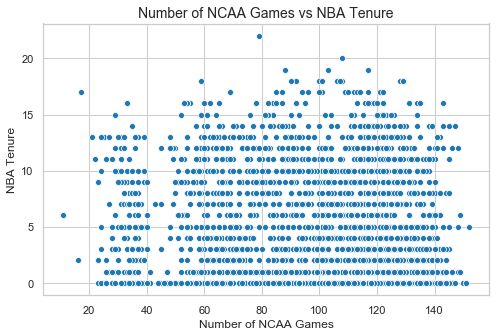

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
chart = sns.scatterplot(x='NCAA_games', y='NBA_tenure',  data=college_extended, ax=ax, color='tab:blue')

chart.set_title('Number of NCAA Games vs NBA Tenure', fontsize=14)
chart.set_xlabel('Number of NCAA Games', fontsize=12)
chart.set_ylabel('NBA Tenure', fontsize=12);

There is no correlation between number of NCAA games and NBA tenure.

Let's examine the starting year of players.

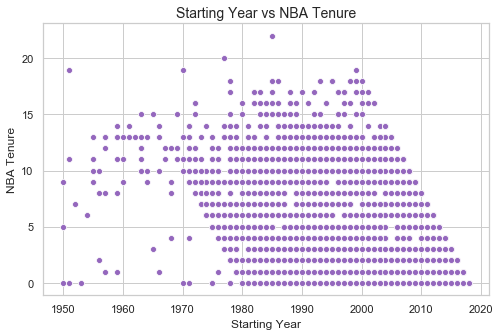

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))
chart = sns.scatterplot(x='active_from', y='NBA_tenure', data=college_extended, ax=ax, color='tab:purple')

chart.set_title('Starting Year vs NBA Tenure', fontsize=14)
chart.set_xlabel('Starting Year', fontsize=12)
chart.set_ylabel('NBA Tenure', fontsize=12);

Here, there is a clear bias. Since our dataset ends in 2018, player's tenures are recorded to end in 2018, making there a relationship between tenure and starting year. We'll not use this feature in our model to avoid this bias.

Let's finally examine player height.

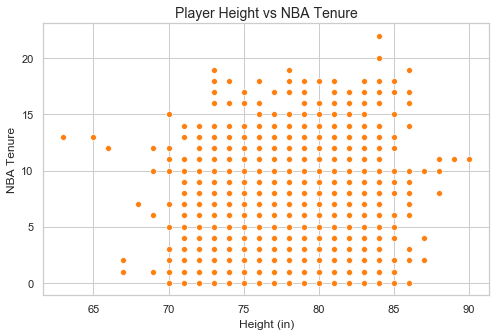

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
chart = sns.scatterplot(x='height_inches', y='NBA_tenure', data=college_extended, ax=ax, color='tab:orange')

chart.set_title('Player Height vs NBA Tenure', fontsize=14)
chart.set_xlabel('Height (in)', fontsize=12)
chart.set_ylabel('NBA Tenure', fontsize=12);

There does not seem to be a strong relationship here.

Let's prepare our data and extract our features. We one-hot encode the `school_popularity` and `position` fields as they are categorical variables.

We also normalize our quantitative variables so we can test a Ridge or Lasso model, whose regularization needs to be normalized. Our quantitative features are NCAA statistics, height, and weight.

In [43]:
def one_hot_encode(df, column):
    '''
    Takes a column and replaces it with with one-hot encoded columns 
    of the original categorical variable
    '''
    vec_enc = DictVectorizer()
    vec_enc.fit(df[[column]].to_dict(orient='records'))
    one_hot = vec_enc.transform(df[[column]].to_dict(orient='records')).toarray()
    one_hot_feature_names = vec_enc.get_feature_names()
    one_hot_position = pd.DataFrame(data=one_hot, columns=one_hot_feature_names)
    df = pd.concat([df.reset_index(), one_hot_position], axis=1)
    df = df.drop(columns=['index', column])
    return df

def normalize_quant_features(df):
    '''
    Normalizes quantitative features.
    '''
    quant_features = ['NCAA_fgapg', 'NCAA_fgpct',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games',
       'NCAA_ppg', 'height_inches', 'weight']
    quant_df = df[quant_features]
    df[quant_features] = (quant_df - quant_df.mean()) / quant_df.std()
    return df

def get_features_and_targed(df):
    '''
    Extracts features and target column from the dataframe.
    '''
    df = df[['NBA_tenure'] + list(college_temp.columns[13:])]
    return df
    
college_temp = one_hot_encode(college_extended, 'school_popularity')
college_temp = one_hot_encode(college_temp, 'position')
college_temp = normalize_quant_features(college_temp)
college_features_and_target = get_features_and_targed(college_temp)
college_features_and_target.describe()

,NBA_tenure,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,height_inches,weight,school_popularity=High,school_popularity=Low,school_popularity=Medium,position=Center,position=Forward,position=Guard
count,2769.000000,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000
mean,5.323221,9.021153e-15,-1.287887e-14,6.391902e-15,2.422684e-15,7.024526e-15,-2.194625e-15,6.703839e-17,2.415146e-15,-4.857877e-16,1.927755e-16,0.349946,0.322499,0.327555,0.096425,0.521849,0.381726
std,4.702712,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.477039,0.467517,0.469406,0.295226,0.499613,0.485898
min,0.000000,-2.534650e+00,-2.758495e+00,-2.482090e+00,-4.925385e+00,-2.253062e+00,-2.165682e+00,-2.907214e+00,-2.658443e+00,-4.412576e+00,-3.065995e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-6.714591e-01,-7.051290e-01,-6.642964e-01,-6.090343e-01,-6.638522e-01,-6.613070e-01,-7.345804e-01,-6.693517e-01,-7.086422e-01,-8.750746e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,-5.966494e-02,-7.587183e-02,-9.623589e-02,1.005028e-01,-1.553052e-01,-7.627215e-02,2.347485e-01,-5.052344e-02,1.461118e-01,-1.063304e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.000000,5.799380e-01,6.196230e-01,5.286307e-01,7.036094e-01,5.439470e-01,5.087627e-01,8.029758e-01,5.904059e-01,7.159478e-01,6.624137e-01,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,22.000000,7.726806e+00,1.184690e+01,6.606878e+00,6.557291e+00,6.582943e+00,6.609840e+00,1.805730e+00,6.756588e+00,3.280210e+00,4.313948e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We split our data into a training and testing set.

In [44]:
college_train, college_test = train_test_split(college_features_and_target, test_size=0.20,
                                                           random_state=42)

Y_train = college_train['NBA_tenure']
Y_test = college_test['NBA_tenure']

We use the root mean square error to validate our training and testing error.

We also have a `cross_validate_rmse` model to be able to evaluate different models and hyperparameters before our testing set.

In [45]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted) ** 2))

In [46]:
def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

Our benchmark model would be to take the average tenure from our training set and predict all tenures in the test set to be the mean value of the training set tenure. We get a baseline rmse of 4.76.

In [47]:
baseline_prediction = [np.mean(Y_train)] * len(Y_test)
baseline_rmse = rmse(Y_test, baseline_prediction)
print(f'baseline rmse: {baseline_rmse}')

baseline rmse: 4.759828131514796


Now feature selection! Here are the features we have for our models.

In [48]:
features = list(college_train.columns[1:])
features

['NCAA_fgapg',
 'NCAA_fgpct',
 'NCAA_fgpg',
 'NCAA_ft',
 'NCAA_ftapg',
 'NCAA_ftpg',
 'NCAA_games',
 'NCAA_ppg',
 'height_inches',
 'weight',
 'school_popularity=High',
 'school_popularity=Low',
 'school_popularity=Medium',
 'position=Center',
 'position=Forward',
 'position=Guard']

First I tried training models with each feature individually and comparing it's cross validation rmse. This way we can see what features might be good predictors for our final model.

I also repeated the process with a `LinearRegression` model, a `Ridge` model, and a `Lasso` model to see what model and features work best.

In [49]:
features_and_rmse = []
for feature in features:
    model = linear_model.LinearRegression(fit_intercept=True)
    X_train = college_train[[feature]]
    feature_rmse = cross_validate_rmse(model, X_train, Y_train)
    features_and_rmse.append((feature_rmse, feature))

sorted(features_and_rmse, key=lambda x: x[0])

/Users/btl787/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


[(4.47983915339195, 'NCAA_fgpg'),
 (4.510889266698748, 'NCAA_ppg'),
 (4.5589092292360665, 'NCAA_ftapg'),
 (4.562320332661843, 'NCAA_fgapg'),
 (4.569062535335844, 'NCAA_ftpg'),
 (4.622810898516224, 'NCAA_fgpct'),
 (4.66809478242199, 'position=Guard'),
 (4.6715127655359066, 'NCAA_games'),
 (4.675966002818005, 'position=Forward'),
 (4.682122939246436, 'height_inches'),
 (4.684468303166221, 'position=Center'),
 (4.685137011625022, 'NCAA_ft'),
 (4.686864348420704, 'weight'),
 (4.687945728927517, 'school_popularity=Medium'),
 (4.6880902694288356, 'school_popularity=High'),
 (4.688572670997719, 'school_popularity=Low')]

In [50]:
features_and_rmse = []
for feature in features:
    model = linear_model.Ridge(alpha=.5)
    X_train = college_train[[feature]]
    feature_rmse = cross_validate_rmse(model, X_train, Y_train)
    features_and_rmse.append((feature_rmse, feature))

sorted(features_and_rmse, key=lambda x: x[0])

[(4.479838545042602, 'NCAA_fgpg'),
 (4.510888875768301, 'NCAA_ppg'),
 (4.558909100852803, 'NCAA_ftapg'),
 (4.56231982013197, 'NCAA_fgapg'),
 (4.569062436362455, 'NCAA_ftpg'),
 (4.622808434032902, 'NCAA_fgpct'),
 (4.668093261908751, 'position=Guard'),
 (4.671512551933836, 'NCAA_games'),
 (4.675964781590443, 'position=Forward'),
 (4.682122578264332, 'height_inches'),
 (4.684466844491478, 'position=Center'),
 (4.68513681699589, 'NCAA_ft'),
 (4.686864161369185, 'weight'),
 (4.687941976721389, 'school_popularity=Medium'),
 (4.688087084556257, 'school_popularity=High'),
 (4.688564638247856, 'school_popularity=Low')]

In [51]:
features_and_rmse = []
for feature in features:
    model = linear_model.Lasso(alpha=.5)
    X_train = college_train[[feature]]
    feature_rmse = cross_validate_rmse(model, X_train, Y_train)
    features_and_rmse.append((feature_rmse, feature))

sorted(features_and_rmse, key=lambda x: x[0])

[(4.508175197254564, 'NCAA_fgpg'),
 (4.539251604789935, 'NCAA_ppg'),
 (4.587650580489831, 'NCAA_ftapg'),
 (4.590680009934379, 'NCAA_fgapg'),
 (4.598282615742606, 'NCAA_ftpg'),
 (4.649035453699403, 'NCAA_fgpct'),
 (4.686428450994667, 'NCAA_ft'),
 (4.686428450994667, 'NCAA_games'),
 (4.686428450994667, 'height_inches'),
 (4.686428450994667, 'weight'),
 (4.686428450994667, 'school_popularity=High'),
 (4.686428450994667, 'school_popularity=Low'),
 (4.686428450994667, 'school_popularity=Medium'),
 (4.686428450994667, 'position=Center'),
 (4.686428450994667, 'position=Forward'),
 (4.686428450994667, 'position=Guard')]

From this experiment, we see that `NCAA_fgpg` is an effective feature as it had the lowest rmse for all three models. Other close features are `NCAA_ppg`, `NCAA_ftapg`, `NCAA_fgapg`, etc. These features also correlated as they deal with the resulting points in the game.

I also tried training a Lasso model with each feature. Lasso has $L_1$ regularization and induces sparsity. This means, most feature weights will be zero and the remaining features may be good features to use.

In [52]:
lasso_model = linear_model.Lasso(alpha=.1)
X_train = college_train[features]
lasso_model.fit(X_train, Y_train)
lasso_rmse = rmse(lasso_model.predict(X_train), Y_train)
print(f'rmse: {lasso_rmse}')

rmse: 4.418676476627578


In [53]:
zipped_coef = list(zip(lasso_model.coef_, range(len(lasso_model.coef_))))
sored_coef = sorted(zipped_coef, key=lambda x: x[0], reverse=True)
for coef, index in sored_coef:
    print(f'feature {features[index]}, lasso coefficient: {coef}')

feature NCAA_fgpg, lasso coefficient: 1.1013998780031788
feature NCAA_fgpct, lasso coefficient: 0.5544921107469434
feature NCAA_ftpg, lasso coefficient: 0.16327496094143798
feature NCAA_ftapg, lasso coefficient: 0.067764969515185
feature NCAA_fgapg, lasso coefficient: 0.0
feature NCAA_ft, lasso coefficient: 0.0
feature NCAA_ppg, lasso coefficient: 0.0
feature height_inches, lasso coefficient: 0.0
feature weight, lasso coefficient: -0.0
feature school_popularity=High, lasso coefficient: 0.0
feature school_popularity=Medium, lasso coefficient: 0.0
feature position=Center, lasso coefficient: 0.0
feature position=Forward, lasso coefficient: 0.0
feature position=Guard, lasso coefficient: -0.0
feature NCAA_games, lasso coefficient: -0.03173681873443396
feature school_popularity=Low, lasso coefficient: -0.396392030273685


The Lasso model selects `NCAA_fgpg`, `NCAA_fgpct`, and `school_popularity=Low` as having the largest magnitude weights. `NCAA_fgpct` might explain how goods a player is an accurate player has a higher field goal percentage.

We split our data into a final training and validation set to build our final model.

My final model is a Ridge Regression model that use features:
* `NCAA_fgpg`, `NCAA_fgpct`,
    * `NCAA_fgpg` clearly has the most correlation with tenure in the NBA. I choose `NCAA_fgpct` because having a high accuracy makes you a better player.

* `height_inches`
    * Taller players should be able to keep playing and have an advantage.

* `school_popularity=High`, `school_popularity=Medium`, `school_popularity=Low`
    * The school popularity might have a weak relationship with tenure. Schools with low popularity do have slightly more players that have short tenures.

In [54]:
college_train_split, college_val = train_test_split(college_train, test_size=0.25, random_state=42)

Y_train_split = college_train_split['NBA_tenure']
Y_val = college_val['NBA_tenure']

model = linear_model.Ridge(alpha=0.25)
choosen_features = [ 
    'NCAA_fgpg',
    'NCAA_fgpct',
    
    'height_inches',
    
    'school_popularity=High',
    'school_popularity=Medium',
    'school_popularity=Low',
]
X_train = college_train_split[choosen_features]

X_val = college_val[choosen_features]

model.fit(X_train, Y_train_split)

Y_train_pred = model.predict(X_train)
train_rmse = rmse(Y_train_pred, Y_train_split)
print(f'train rmse: {train_rmse:.2f}')

Y_val_pred = model.predict(X_val)
val_rmse = rmse(Y_val_pred, Y_val)
print(f'val rmse: {val_rmse:.2f}')

print()
zipped_coef = list(zip(model.coef_, range(len(model.coef_))))
sored_coef = sorted(zipped_coef, key=lambda x: x[0], reverse=True)
for coef, index in sored_coef:
    print(f'feature {choosen_features[index]}, ridge coefficient: {coef}')

train rmse: 4.39
val rmse: 4.49

feature NCAA_fgpg, ridge coefficient: 1.3775415424410857
feature NCAA_fgpct, ridge coefficient: 0.6515157649052655
feature school_popularity=High, ridge coefficient: 0.3660029717610427
feature school_popularity=Medium, ridge coefficient: 0.29246616806703
feature height_inches, ridge coefficient: 0.0149721640559186
feature school_popularity=Low, ridge coefficient: -0.6584691398276705


Our final model has a training rmse of 4.39 and validation rmse of 4.49. It weighs `NCAA_fgpg` most importantly, `NCAA_fgpct` second and `school_popularity=Low` as negative, matching what we hypothesized.

## Test Model's RMSE

In [55]:
X_test = college_test[choosen_features]
Y_pred = model.predict(X_test)
test_rmse = rmse(Y_test, Y_pred)
print(test_rmse)

4.474766574627041


Our final model has a test rmse of 4.47. This shows an improvement over the baseline rmse of 4.76.

We can answer our final question of what college factors are good predictors of tenure in the NBA. __Q4: A player's field goals per game, and his field goal percentage are good predictors of tenure in the NBA as they better players will have higher numbers of field goals and higher field goal percentages. Additionally, players from low popularity schools are more likely to have shorter tenures.__ 

That answers all the questions we had! We compared schools of different popularities like Kansas and Berkeley, and we attempted to predict a player's tenure in the NBA and were able to beat the baseline model!